In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from shapely.geometry import Point

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Assingment_Dataset.xlsx")

In [3]:
df

,ID,Timestamp,Latitude,Longitude,Location,Movement Type,Country
0,1,2024-03-01 07:15:00,28.7041,77.1025,Border Post Alpha,Entry,Country A
1,2,2024-03-02 12:30:00,28.7042,77.1030,Border Post Alpha,Exit,Country A
2,3,2024-03-05 08:15:00,28.7043,77.1032,Border Post Alpha,Entry,Country A
3,4,2024-03-07 10:00:00,28.7044,77.1035,Border Post Alpha,Exit,Country A
4,5,2024-03-09 14:45:00,28.7045,77.1038,Border Post Alpha,Entry,Country A
5,6,2024-03-12 16:20:00,28.7046,77.1040,Border Post Bravo,Entry,Country B
6,7,2024-03-14 11:50:00,28.7047,77.1042,Border Post Bravo,Exit,Country B
7,8,2024-03-17 13:30:00,28.7048,77.1045,Border Post Bravo,Entry,Country B
8,9,2024-03-19 15:00:00,28.7049,77.1048,Border Post Bravo,Exit,Country B
9,10,2024-03-22 08:25:00,28.7050,77.1050,Border Post Bravo,Entry,Country B


###  Movement Hotspots

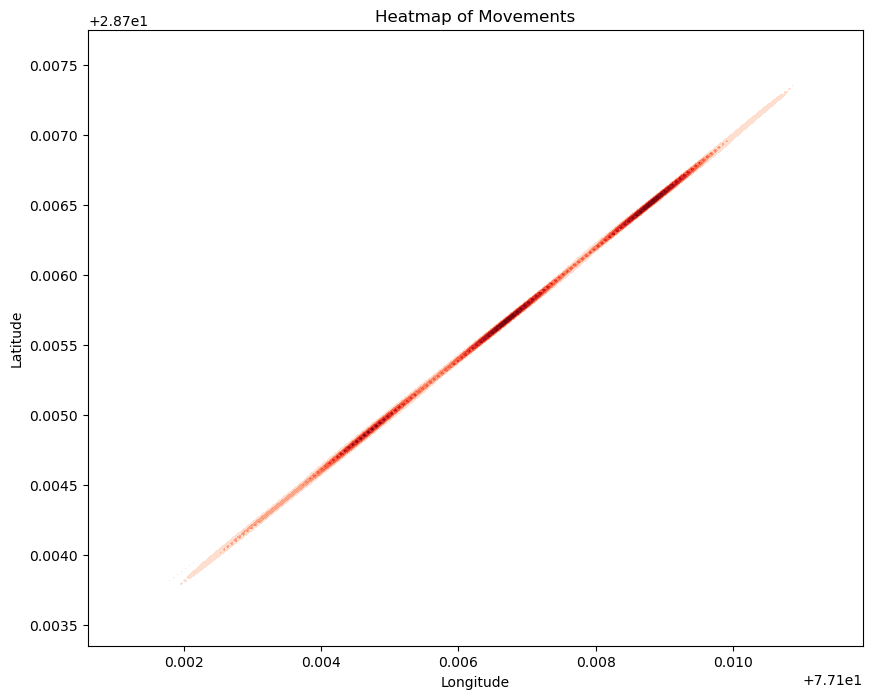

In [4]:
# Step 1: Load the dataset
data = df

# Step 2: Convert the DataFrame into a GeoDataFrame
geometry = [Point(xy) for xy in zip(data['Longitude'], data['Latitude'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

# Step 3: Perform geospatial analysis to identify cross-border movements
# Here, you would typically need a boundary layer to define the border regions.

# Step 4: Create a Heatmap to identify hotspots of movements
# Plotting with seaborn (matplotlib for static visualization)
plt.figure(figsize=(10, 8))
sns.kdeplot(
    data=geo_df,
    x='Longitude', y='Latitude',
    cmap="Reds", shade=True, bw_adjust=0.5
)
plt.title('Heatmap of Movements')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Step 5: Create an interactive map with Folium
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=5)

# Adding points to the map
for idx, row in geo_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"Location: {row['Location']}\nMovement Type: {row['Movement Type']}",
        color='blue' if row['Movement Type'] == 'Entry' else 'red',
        fill=True,
        fill_color='blue' if row['Movement Type'] == 'Entry' else 'red'
    ).add_to(m)

# Display the map
m.save("movement_hotspots.html")
m